In [3]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습,예측 데이터셋 나누기

In [6]:
#label값을 기준으로 나눈다

(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [7]:
train = df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [8]:
test = df[df['Insulin']==0].copy()
test.shape

#이거 왜 0인것만 골라놨지 ?

(374, 9)

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


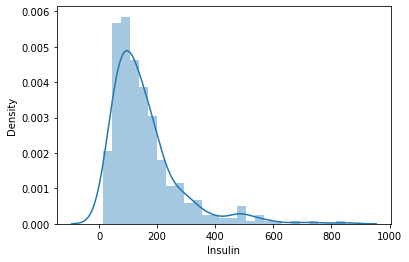

In [9]:
sns.distplot(train['Insulin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


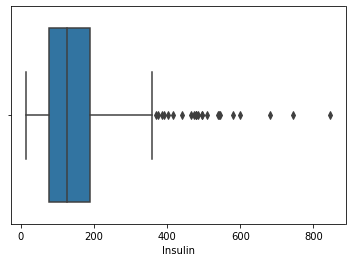

In [10]:
sns.boxplot(train['Insulin'])

In [11]:
#이상치 구하기
desc = train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [12]:
#IQR : 3IQR - 1IQR
#OUT > 3IQR (IQR * 1.5)
IQR = desc.loc['75%'] - desc.loc['25%']
OUT = desc.loc['75%'] + IQR*1.5

In [13]:
train[train['Insulin']>OUT].shape

(24, 9)

In [14]:
print(train.shape)
train = train[train['Insulin']<OUT]
train.shape

(394, 9)


(370, 9)

## 학습,예측에 사용할 컬럼

In [15]:
feature_names = test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [16]:
label_name = 'Insulin'
label_name

'Insulin'

## 학습,예측 데이터셋 만들기

In [17]:
#학습세트(기출문제)

X_train = train[feature_names]
X_train.shape

(370, 8)

In [18]:
#정답값(기출문제정답)

y_train = train[label_name]
y_train.shape

(370,)

In [19]:
#예측에 사용할 데이터세트 (실전시험문제)
X_test = test[feature_names]
X_test.shape

(374, 8)

In [20]:
#예측의 정답값 (실전시험문제 정답)
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [39]:
results=[]
for estimator in estimators:
  result=[]
  result.append(estimator.__class__.__name__)
  results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [40]:
from sklearn.model_selection import RandomizedSearchCV

results=[]
for estimator in estimators:
  result=[]
  
  max_depth = np.random.randint(5, 30, 10)
  max_features = np.random.uniform(0.3, 1.0, 10)

  param_distributions = {'max_depth':max_depth, 'max_features':max_features}
  regressor = RandomizedSearchCV(estimator,
                    param_distributions,
                    n_iter=10,
                    scoring=None,
                    n_jobs=None,
                    cv=5,
                    verbose=2,
                    random_state=42
                    )
  regressor.fit(X_train, y_train)

  result.append(estimator.__class__.__name__)
  result.append(regressor.best_params_)
  result.append(regressor.best_estimator_)
  result.append(regressor.best_score_)
  result.append(regressor.cv_results_)           
  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=22, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=22, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=22, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=22, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=22, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.6169866145431306; total time=   0.0s
[CV] END ......max_depth=16, max_features=0.6203696710819263; total time=   0.0s
[CV] END ......max_depth=16, max_features=0.6203

In [42]:
df_cv = pd.DataFrame(results)
df_cv.columns=['model', 'params', 'estimator', 'score', 'cv_result']
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.7227967408414789, 'max_dept...","DecisionTreeRegressor(max_depth=5, max_feature...",0.160619,"{'mean_fit_time': [0.004776287078857422, 0.004..."
1,RandomForestRegressor,"{'max_features': 0.6189294824366827, 'max_dept...","(DecisionTreeRegressor(max_depth=14, max_featu...",0.340609,"{'mean_fit_time': [0.1703345775604248, 0.17065..."
2,GradientBoostingRegressor,"{'max_features': 0.4960514049609919, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.299278,"{'mean_fit_time': [0.1264265537261963, 0.12756..."


In [45]:
best_estimator = df_cv.loc[1, 'estimator']
best_estimator

RandomForestRegressor(max_depth=14, max_features=0.6189294824366827,
                      random_state=42)

##학습(훈련)

```
# 기출문제(X_train) 정답(y_train)
```



In [46]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features=0.6189294824366827,
                      random_state=42)

##  cross validation으로 학습 세트의 오차 측정하기

In [47]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


array([ 49.41133333, 164.61      ,  95.96      , 145.36984127,
       183.70083333])

In [48]:
#정답을 정확하게 맞춘 갯수 - 394개중 3개
#-> 5개 (600) -> 7개 (OUT) -> 0 (이것보단 오차가 얼마나 줄었는지가 더 중요)
(y_predict==y_train).sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


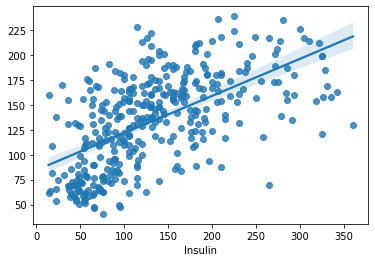

In [49]:
#regplot으로 결과값 비교

sns.regplot(y_train, y_predict)

In [50]:
#r2_score

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.3518742958004131

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


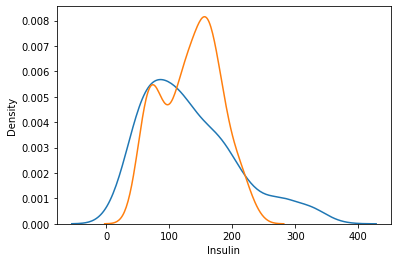

In [51]:
#distplot로 정답값과 예측값의 분포 그리기

sns.distplot(y_train, hist=False, label='train')
sns.distplot(y_predict, hist=False, label='predict')

## 오차 구하기

In [53]:
#MAE
# 86 -> 77.55 (600) -> 62.05 (OUT)
#-> 44.385 (RandomSearchCV)
error  = abs(y_train- y_predict)
error.mean()

44.555025813464574

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


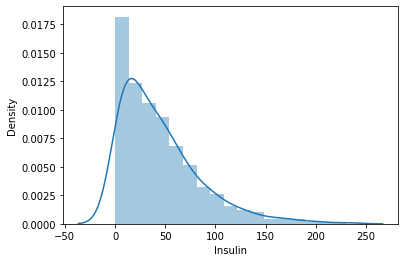

In [54]:
sns.distplot(error)

In [55]:
error.describe()

count    370.000000
mean      44.555026
std       39.825051
min        0.020760
25%       14.065870
50%       34.049413
75%       62.752250
max      230.014056
Name: Insulin, dtype: float64

In [56]:
#RMSE
#126 -> 114 -> 84
#-> 59.72
np.sqrt(((y_train - y_predict)**2).mean())

59.723516541856334

## 트리알고리즘 분석하기

*   의사결정나무를 시각화

*   피처의 중요도를 구한다



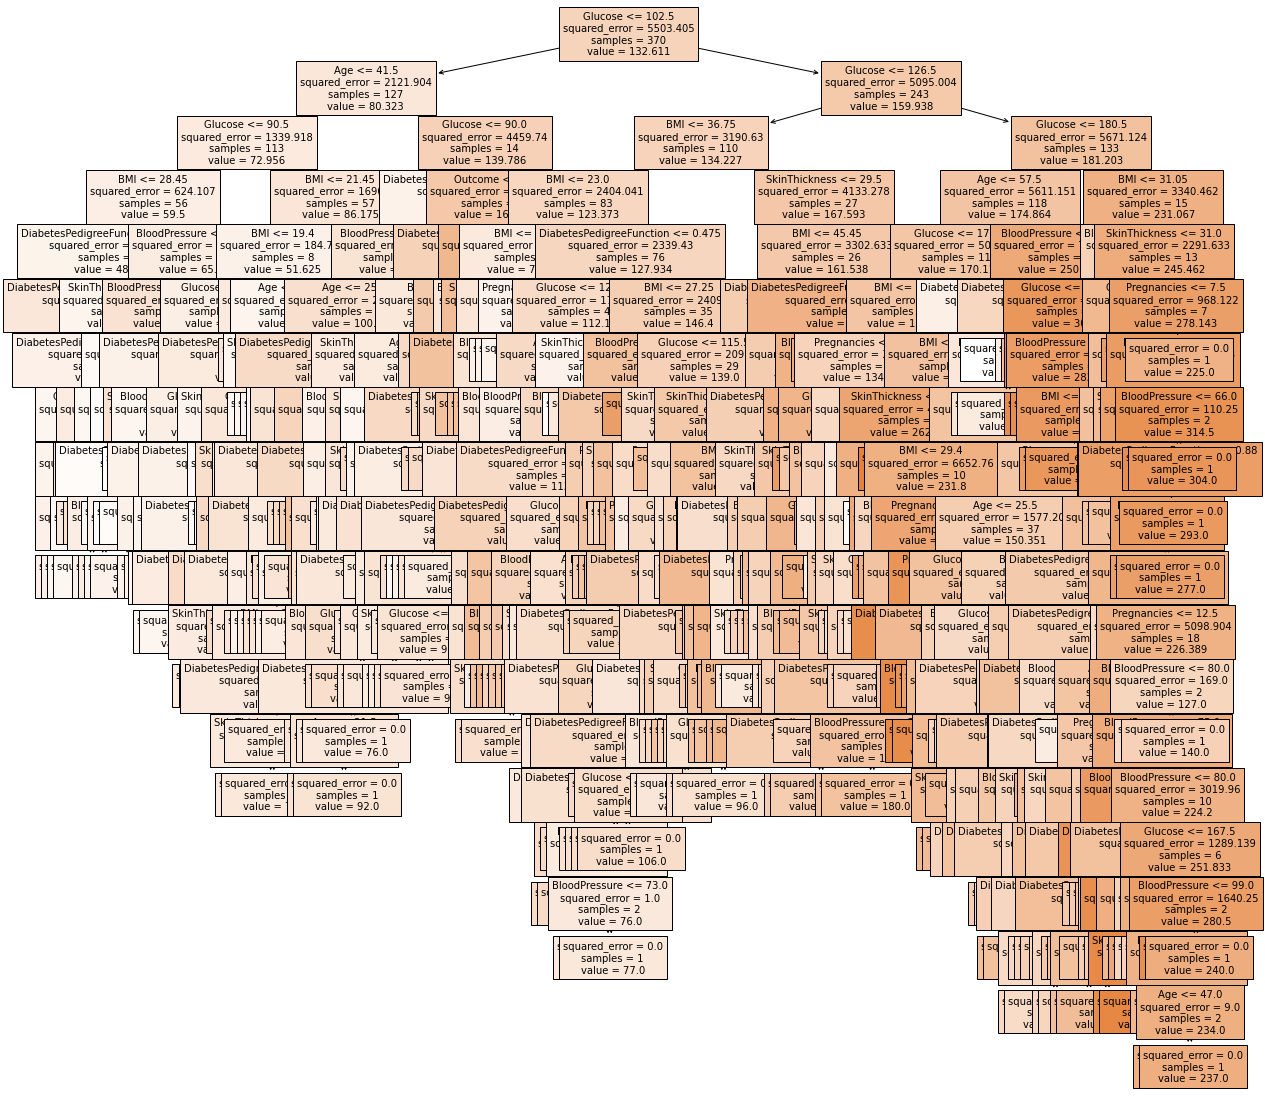

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, 
          feature_names = feature_names, 
          filled=True, 
          fontsize=10)

In [57]:
#피처의 중요도 추출
best_estimator.feature_importances_

array([0.0546818 , 0.38515432, 0.06778327, 0.09533463, 0.13559257,
       0.10651047, 0.10790182, 0.04704111])

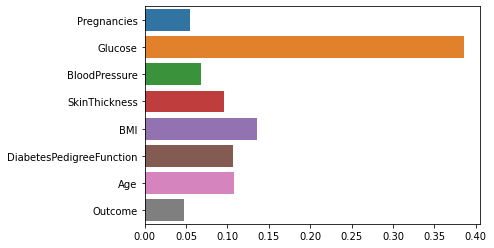

In [59]:
# 시각화
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

##예측
*실전시험문제(X_test)

In [60]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([181.91683604,  61.675     , 180.09666667, 147.89328885,
       171.41      ])

In [61]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [62]:
test['Insulin']=y_test
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.356169,43.039801,50.260491,96.621000,135.083156,166.946826,227.718000
1,138.0,172.379597,29.403884,99.275000,152.464264,172.639913,189.883177,244.917143


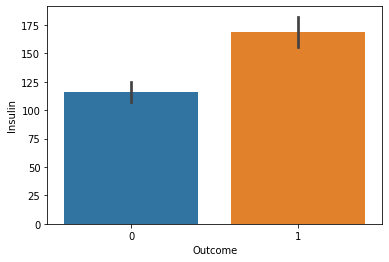

In [63]:
#insulin 평균값 시각화
sns.barplot(data=train, x='Outcome', y='Insulin')

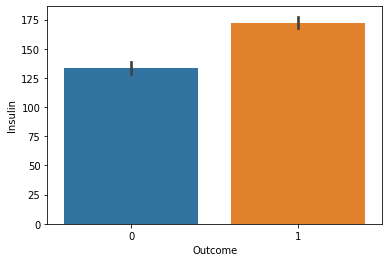

In [64]:
sns.barplot(data=test, x='Outcome', y='Insulin')

## 예측값을 CSV파일로 저장하기

In [66]:
df.loc[df['Insulin']==0, 'Insulin']

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [68]:
#원래 0이었던 값을 우리가 예측한 값으로 채워준다
df.loc[df['Insulin']==0, 'Insulin'] = test['Insulin']

In [72]:
df.to_csv('diabetes_fill_insulin.csv', index=False)

In [73]:
pd.read_csv('diabetes_fill_insulin.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,181.916836,33.6,0.627,50,1
1,1,85,66,29,61.675000,26.6,0.351,31,0
2,8,183,64,0,180.096667,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,171.439901,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,157.509126,30.1,0.349,47,1
